In [8]:
import math
import pickle

import matplotlib.pyplot as plt
import torch

In [2]:
with open("instance.pickle", "rb") as file:
    instance = pickle.load(file)

In [3]:
(k, m, n, stdev) = (instance.k, instance.m, instance.n, instance.stdev)
(A, x0, noise, y) = (instance.A, instance.x0, instance.noise, instance.y)

In [4]:
beta_tau = 1e6
beta_xi = 1e6

In [5]:
mu = torch.zeros(n)
Gamma = torch.eye(n)

In [6]:
nu_tau = 1
nu_xi = 1

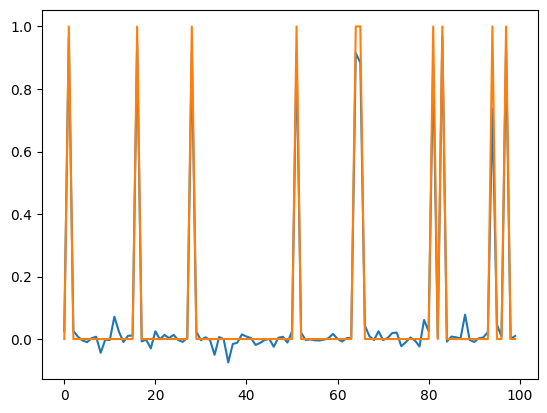

In [7]:
for _ in range(100):
    m2 = mu.square() + Gamma.diag()
    nu_w = (nu_xi / (m2 + 1e-9)).sqrt()
    
    nu_xi = (beta_xi / nu_w.reciprocal().sum()).sqrt()

    ess = (y - A @ mu).square().sum() + (A.t() @ A @ Gamma).diag().sum()
    nu_tau = (beta_tau / ess).sqrt()
    
    Gamma = torch.linalg.inv(nu_w.diag() + nu_tau * A.t() @ A)
    mu = nu_tau * Gamma @ A.t() @ y

plt.plot(mu);
plt.plot(x0);

In [12]:
def inverse_normal(x, nu, lmb):
    return math.sqrt(lmb / (2 * math.pi * nu**3)) * torch.exp(-lmb * (x - nu).square() / (2 * nu**2 * x))

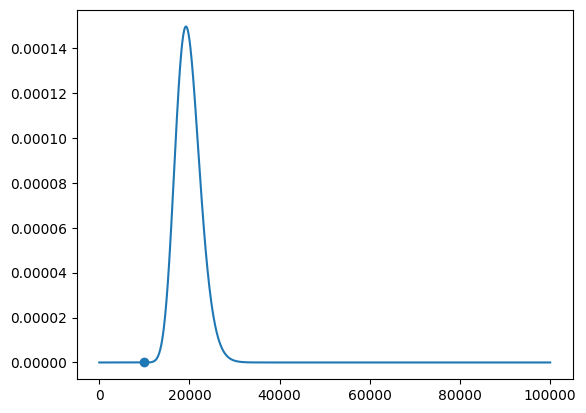

In [27]:
x = torch.linspace(0, 1e5, 1000)
plt.plot(x, inverse_normal(x, nu_tau.item(), beta_tau));
plt.scatter([1 / stdev**2], [0]);

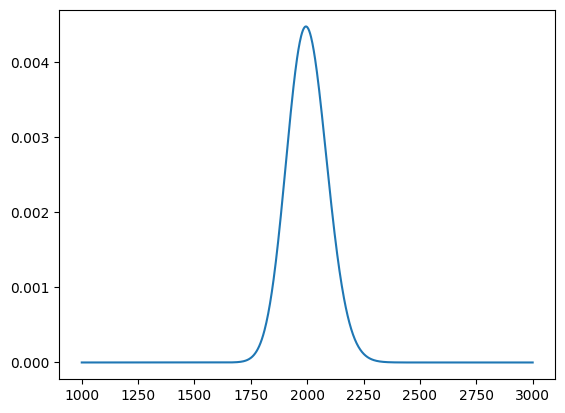

In [33]:
x = torch.linspace(1e3, 3e3, 1000)
plt.plot(x, inverse_normal(x, nu_xi.item(), beta_xi));

### Takeaways

1. Setting $\beta_\tau = \beta_\xi \gg 1/\sigma^2$ seems to work well. The converged $q(\tau)$ and $q(\xi)$ are
   what you'd expect to set based on knowledge of $\sigma$ and the fixed-$\xi$ experiments.
2. For experimenting with the "algebraic" changes, the non-extended VRLS can be used.
3. We can probably relate $\tau / \xi$ to expected SNR.